---
# <font color="#CA3532">Deep Learning Fundamentals and Basic Tools (2025/2026) - Lab Assignment 1</font>
---

Last updated on 2025-09-12

Please report any bugs to luis.lago@uam.es



---

This first lab includes the following tasks:

- An introduction to [Numpy](https://numpy.org/), the main library for scientific computing and matrix manipulation in Python.

- The implementation of the linear regression and logistic regression models.

- An introduction to [TensorFlow](https://www.tensorflow.org/), an open source library for Machine Learning developed by Google.

- An implementation of a feedforward neural network using Numpy and TensorFlow.


### <font color="#CA3532">Clone the lab's github repo</font>

The easiest way of getting all the lab material is to clone our github repository:

### <font color="#CA3532">Instructions</font>

- The assignment must be done in pairs.

- All the exercises are described in this notebook. You must code your solutions in the file ``dlfbt_lab1.py`` provided as part of the material. Just complete the sections in the code marked with ``TO-DO`` comments and upload the file to the [course Moodle page](https://posgrado.uam.es/course/view.php?id=67718) before the due date.

- The only file you have to turn in is ``dlfbt_lab1.py``.

- No code must be added out of the ``TO-DO`` blocks.

- Do not forget to include your names and NIAs at the beginning of the file.

- **Due date:** Friday, 2025-09-26, 13:00.

- **Evaluation:** The submitted material will be subjected to a set of automated tests and will be evaluated as *pass* or *fail* based on the results of these tests. Students who receive a *pass* will take a practical exam on Monday, September 29th, which will determine their final grade. In this exam you will be asked to do small modifications to **your** code, in order to verify that it is really **yours**.

### <font color="#CA3532">Import the libraries</font>

The following code cells import the required libraries.

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pickle

In [99]:
import sys
sys.path.append('DLFBT-LAB')
import dlfbt

### <font color="#CA3532">Exercise 0. Numpy basics</font>

This exercise must not be turned in.

Read these [Numpy notes](https://cs231n.github.io/python-numpy-tutorial/#numpy) and solve the following exercises.

In [15]:
# (1) Create a numpy array of dimension 4x3 filled with random integers between
#     0 and 5. Assign the result to variable A.

A = np.random.randint(0, 6, size=(4, 3))
print(A)

[[1 2 2]
 [3 1 0]
 [0 4 4]
 [2 3 1]]


In [16]:
# (2) Create a numpy array of dimension 3x2 filled with random integers between
#     0 and 5. Assign the result to variable B.

B = np.random.randint(0, 6, size=(3, 2))

In [17]:
# (3) Multiply (dot product) the two arrays A and B. Assign the result to
#     variable C.

C =  np.dot(A, B)

In [ ]:
# (4) Add the array B to the 3x2 first positions of array A.



In [8]:
# (5) Without using any loop, create the numpy array D with the following
#     content:
#     [[  1   2   3   4   5   6   7   8   9  10]
#      [  2   4   6   8  10  12  14  16  18  20]
#      [  3   6   9  12  15  18  21  24  27  30]
#      [  4   8  12  16  20  24  28  32  36  40]
#      [  5  10  15  20  25  30  35  40  45  50]
#      [  6  12  18  24  30  36  42  48  54  60]
#      [  7  14  21  28  35  42  49  56  63  70]
#      [  8  16  24  32  40  48  56  64  72  80]
#      [  9  18  27  36  45  54  63  72  81  90]
#      [ 10  20  30  40  50  60  70  80  90 100]]

In [6]:
# (6) Without using any loop, transform the variable t to one-hot encoding, and
#     compare the result with that obtained using keras.utils.to_categorical.
#     If, for example, t is [2 3 1 0], its one-hot encoding should be:
#     [[0. 0. 1. 0.]
#      [0. 0. 0. 1.]
#      [0. 1. 0. 0.]
#      [1. 0. 0. 0.]]
from tensorflow.keras.utils import to_categorical

t = np.random.randint(0, 4, 10)
one_hot_t = to_categorical(t)

# Solve the exercise in variable my_one_hot_t
# To-do...

# Compare:
assert (my_one_hot_t == one_hot_t).all(), "Error: Your solution does not match keras.utils.to_categorical"

NameError: name 'my_one_hot_t' is not defined

### <font color="#CA3532">Exercise 1. Linear regression</font>

In the file ``dlfbt_lab1.py``, complete the code of the class ``LinearRegressionModel`` by filling all the ``TO-DO`` blocks, so that it implements a Linear Regression model.

You can run the following code to test your implementation. We suggest that you write the code incrementally, testing each method according to the following points.

In [93]:
%load_ext autoreload
%autoreload 2
from dlfbt_lab1 import LinearRegressionModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**1. Implement the ``predict`` method.** Then check your implementation by running the following tests.

Test on a single scalar value:

In [100]:
linrm = LinearRegressionModel()
linrm.w = np.array([[2.0]])
linrm.b = np.array([[1.0]])

x = np.array([[3.0]])
t = np.array([[6.0]])
y = linrm.predict(x)

assert y.shape == (1, 1)
assert y == [[7.]]
assert linrm.get_loss(x, t) == 0.5

Test on 1D data:

In [101]:
dg = dlfbt.DataGeneratorLinear()
dg.create_dataset(noise=0.0)

linrm = LinearRegressionModel()
linrm.w = dg.a
linrm.b = dg.b

y = linrm.predict(dg.x)

tol = 1.e-15
assert y.shape == (100, 1)
assert np.abs(y - dg.t).max() < tol
assert linrm.get_loss(dg.x, dg.t) < tol

Test on multidimensional data:

In [102]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(noise=0.0, n=500)

linrm = LinearRegressionModel()
linrm.w = dg.a
linrm.b = dg.b

y = linrm.predict(dg.x)

tol = 1.e-15
assert y.shape == (500, 1)
assert np.abs(y - dg.t).max() < tol
assert linrm.get_loss(dg.x, dg.t) < tol

**2. Implement the ``compute_gradients`` method.** Then check your implementation by running the following tests.

Test on a single scalar value:

In [104]:
linrm = LinearRegressionModel()
linrm.w = np.array([[2.0]])
linrm.b = np.array([[1.0]])

db, dw = linrm.compute_gradients(np.array([[3.0]]), np.array([[6.0]]))

assert db.shape == (1, 1)
assert db == [[1.]]
assert dw.shape == (1, 1)
assert dw == [[3.]]

Test on 1D data:

In [108]:
dg = dlfbt.DataGeneratorLinear()
dg.create_dataset(n=1000, seed=17)

linrm = LinearRegressionModel()
linrm.w = dg.a
linrm.b = dg.b

db, dw = linrm.compute_gradients(dg.x, dg.t)

tol = 1.e-8
assert db.shape == (1, 1)
assert np.abs(db[0][0] + 0.13987394) < tol
assert dw.shape == (1, 1)
assert np.abs(dw[0][0] + 0.581568) < tol  

Test on multidimensional data:

In [109]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(n=50000, seed=17)

linrm = LinearRegressionModel()
linrm.w = dg.a
linrm.b = dg.b

db, dw = linrm.compute_gradients(dg.x, dg.t)

tol = 1.e-8
assert db.shape == (1, 1)
assert np.abs(db[0][0] + 0.00704326) < tol
assert dw.shape == (4, 1)
assert np.abs(dw[0][0] + 0.05353578) < tol
assert np.abs(dw[1][0] + 0.03276935) < tol
assert np.abs(dw[2][0] + 0.00337341) < tol
assert np.abs(dw[3][0] + 0.03293776) < tol

**3. Implement the ``gradient_step`` method.** Then check your implementation by running the following tests.

Test on 1D data:

In [110]:
dg = dlfbt.DataGeneratorLinear1D()
dg.create_dataset(seed=17)

linrm = LinearRegressionModel()
linrm.w = np.array([[-2.0]])
linrm.b = np.array([[-3.0]])

loss = linrm.fit(dg.x, dg.t, 0.01, 200)

tol = 1.e-15
assert np.abs(loss[-1] - 2.5208907868478994) < tol

Plot loss versus iteration:

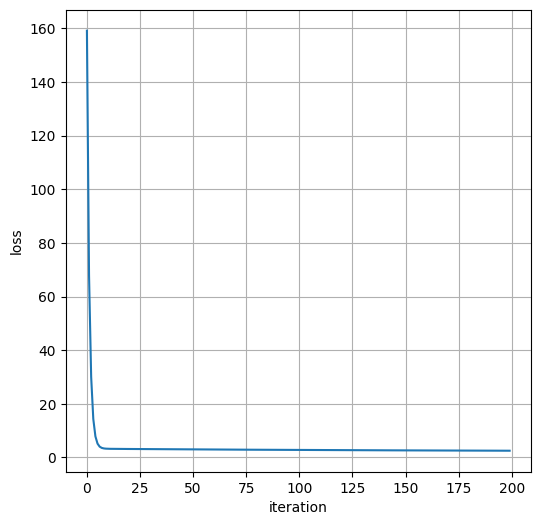

In [111]:
plt.figure(figsize=(6, 6))
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid(True)
plt.show()

Plot the model:

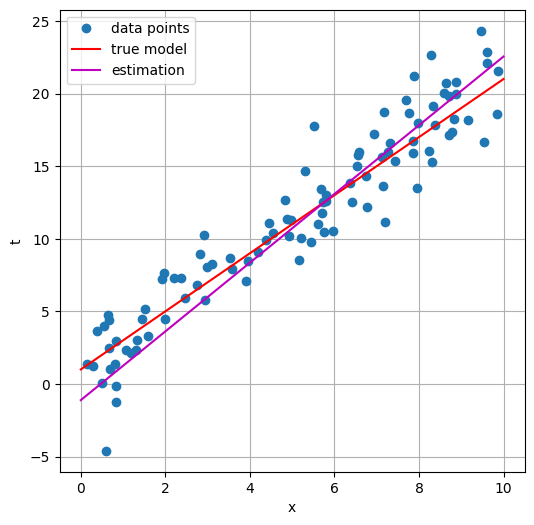

In [112]:
xx = dg.modelx
yy = linrm.predict(xx)
dg.plot_dataset(estimation=(xx, yy))

Test on 2D data:

In [113]:
dg = dlfbt.DataGeneratorLinear(a=[2.0, 2.0])
dg.create_dataset(n=500, seed=17)

linrm = LinearRegressionModel(2)
linrm.w = np.array([[-2.0], [-2.0]])
linrm.b = np.array([[-3.0]])

loss = linrm.fit(dg.x, dg.t, 0.01, 100)

tol = 1.e-15
assert np.abs(loss[-1] - 2.660068435196912) < tol

Plot loss versus iteration:

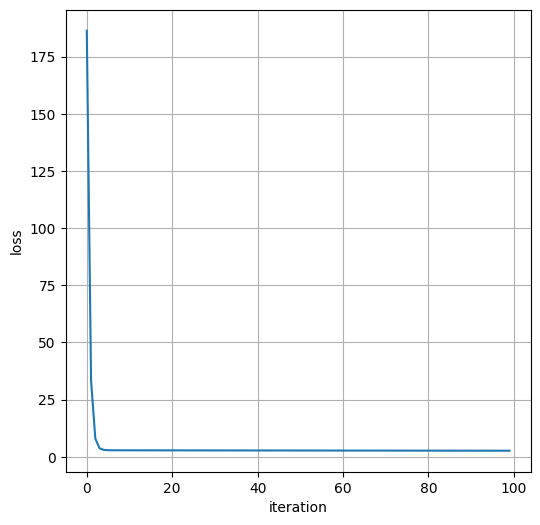

In [114]:
plt.figure(figsize=(6, 6))
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid(True)
plt.show()

Plot predictions versus targets (should distribute along $y=x$):

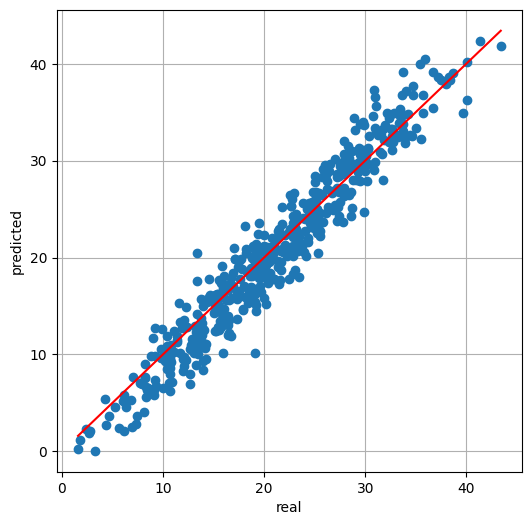

In [115]:
y = linrm.predict(dg.x)
plt.figure(figsize=(6, 6))
plt.plot(dg.t, y, 'o')
plt.plot([dg.t.min(), dg.t.max()], [dg.t.min(), dg.t.max()], 'r-')
plt.xlabel('real')
plt.ylabel('predicted')
plt.grid(True)
plt.show()

Plot the a 3D representation of the model:

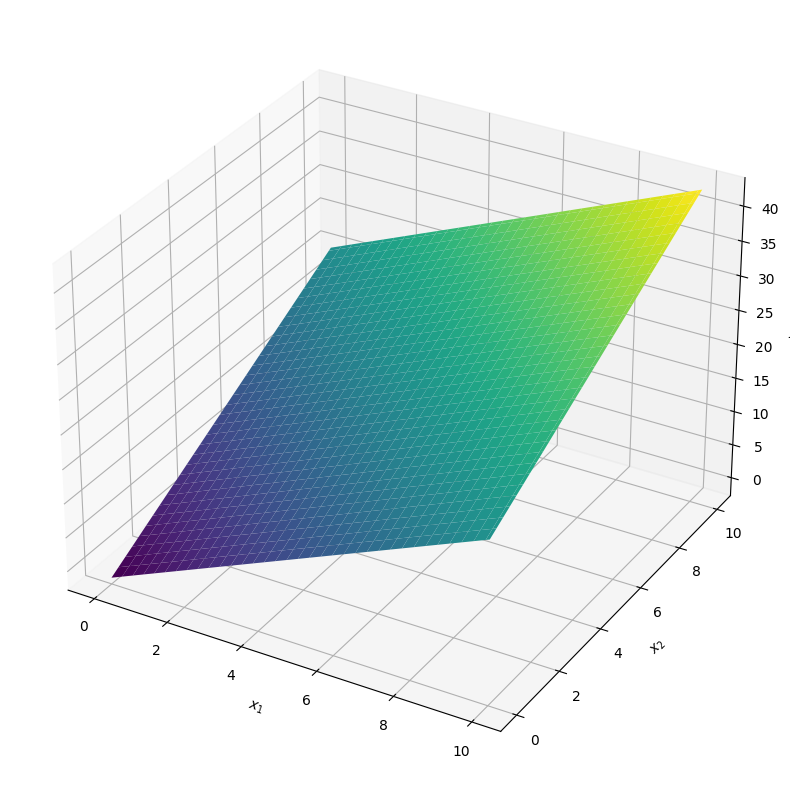

In [116]:
xx, yy = np.meshgrid(dg.modelx, dg.modelx)
zz = linrm.predict(np.concatenate((xx.ravel()[:, None], yy.ravel()[:, None]), axis=1)).reshape(xx.shape)

plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, zz, cmap='viridis')
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$y$')
plt.show()

### <font color="#CA3532">Exercise 2. Logistic regression</font>

In the file ``dlfbt_lab1.py``, complete the code of the class ``LogisticRegressionModel`` by filling the ``TO-DO`` block, so that it implements a Logistic Regression model. Note that this class is an extension of the class ``LinearRegressionModel``. You should overwrite the necessary methods only.

You can run the following code to test your implementation.

In [117]:
%load_ext autoreload
%autoreload 2
from dlfbt_lab1 import LogisticRegressionModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**1. Test the ``predict`` method:**

Test on a single scalar value:

In [118]:
logrm = LogisticRegressionModel()
logrm.w = np.array([[2.0]])
logrm.b = np.array([[-2.0]])

x = np.array([[2.0]])
t = np.array([[1.0]])
y = logrm.predict(x)

tol = 1.e-8
assert y.shape == (1, 1)
assert np.abs(y[0][0] - 0.88079708) < tol
assert np.abs(logrm.get_loss(x, t) - 0.1269280110) < tol

Test on 1D data:

In [119]:
dg = dlfbt.DataGeneratorLogistic()
dg.create_dataset(seed=17)

logrm = LogisticRegressionModel()
logrm.w = dg.a
logrm.b = dg.b

y = logrm.predict(dg.x)

tol = 1.e-8
assert y.shape == (1000, 1)
assert np.abs(logrm.get_loss(dg.x, dg.t) - 0.1796979922586585) < tol

Test on multidimensional data:

In [120]:
dg = dlfbt.DataGeneratorLogistic(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(n=500, seed=17)

logrm = LogisticRegressionModel()
logrm.w = dg.a
logrm.b = dg.b

y = logrm.predict(dg.x)

tol = 1.e-8
assert y.shape == (500, 1)
assert np.abs(logrm.get_loss(dg.x, dg.t) - 0.020315686967631474) < tol

**2. Test the ``fit`` method:**

Test on 1D data:

In [121]:
dg = dlfbt.DataGeneratorLogistic1D()
dg.create_dataset(seed=17)

logrm = LogisticRegressionModel()
logrm.w = np.array([[-2.0]])
logrm.b = np.array([[-3.0]])

loss = logrm.fit(dg.x, dg.t, 0.01, 15000)

tol = 1.e-8
assert np.abs(logrm.get_loss(dg.x, dg.t) - 0.1960565561171435) < tol

Plot loss versus iteration:

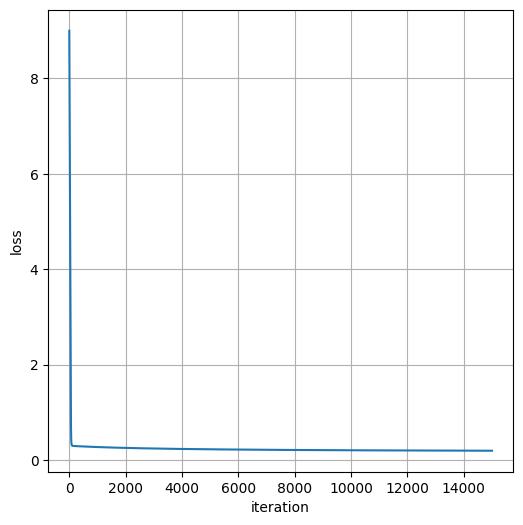

In [122]:
plt.figure(figsize=(6, 6))
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid(True)
plt.show()

Plot the model:

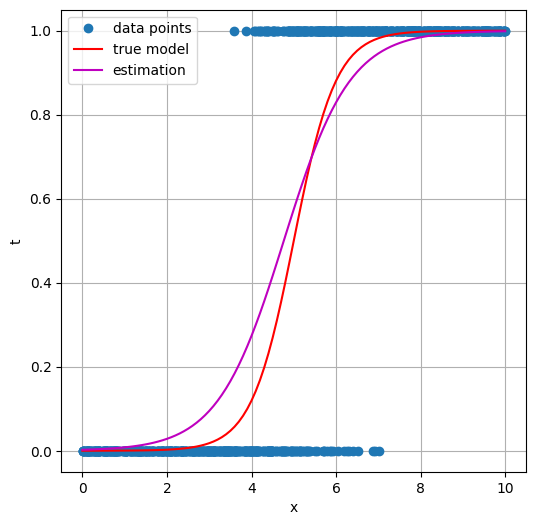

In [123]:
xx = dg.modelx
yy = logrm.predict(xx)
dg.plot_dataset(estimation=(xx, yy))

Test on 2D data:

In [124]:
dg = dlfbt.DataGeneratorLogistic(a=[2.0, 2.0], b=-20.0)
dg.create_dataset(n=500, seed=17)

logrm = LogisticRegressionModel(2)
logrm.w = np.array([[-2.0], [-2.0]])
logrm.b = np.array([[-3.0]])

loss = logrm.fit(dg.x, dg.t, 0.01, 50000)

tol = 1.e-8
assert np.abs(loss[-1] - 0.17895705991377248) < tol

Plot loss versus iteration:

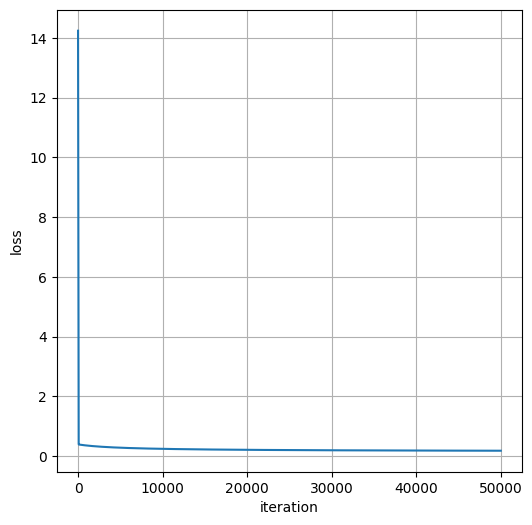

In [125]:
plt.figure(figsize=(6, 6))
plt.plot(loss)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.grid(True)
plt.show()

Plot the a 3D representation of the model:

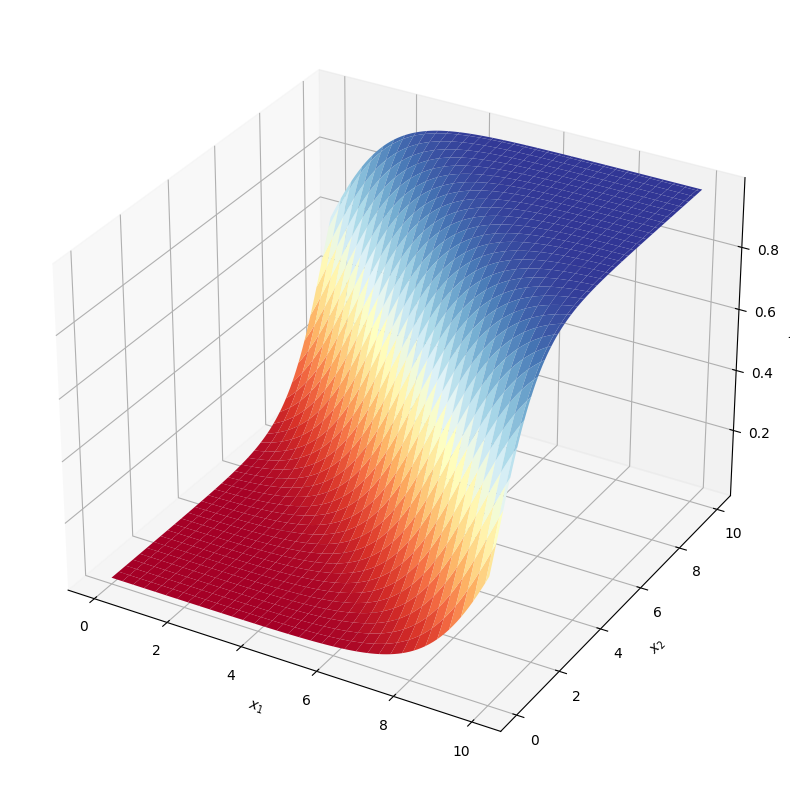

In [126]:
xx, yy = np.meshgrid(dg.modelx, dg.modelx)
zz = logrm.predict(np.concatenate((xx.ravel()[:, None], yy.ravel()[:, None]), axis=1)).reshape(xx.shape)

plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, zz, cmap='RdYlBu')
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$y$')
plt.show()

Contour plot with data points superimposed:

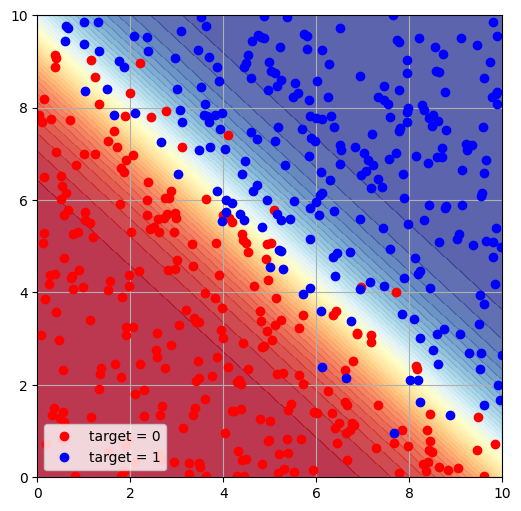

In [127]:
ix0 = (dg.t == 0).ravel()
ix1 = (dg.t == 1).ravel()

plt.figure(figsize=(6, 6))
plt.contourf(xx, yy, zz, 40, cmap='RdYlBu', alpha=0.8)
plt.plot(dg.x[ix0, 0], dg.x[ix0, 1], 'or', label="target = 0")
plt.plot(dg.x[ix1, 0], dg.x[ix1, 1], 'ob', label="target = 1")
plt.grid(True)
plt.legend()
plt.axis([0, 10, 0, 10])
plt.show()

### <font color="#CA3532">Introduction to TensorFlow</font>

Read the following introduction to TensorFlow before proceeding with the next exercises.

We will use TensorFlow 2. The following cell imports the library.

In [128]:
import tensorflow as tf

### <font color="#CA3532">Basic concepts</font>

A **tensor** is a data array with an arbitrary number of dimensions. This number of dimensions is called the tensor *rank*. Hence:

- A scalar is a tensor of rank 0.
- A vector is a tensor of rank 1.
- A matrix is a tensor of rank 2.

Let us see some examples.

In [129]:
# A scalar is a tensor of rank 0:
t0 = tf.constant(3.)
print(t0)
print(t0.numpy())
print(tf.shape(t0).numpy())
print(tf.rank(t0).numpy())

tf.Tensor(3.0, shape=(), dtype=float32)
3.0
[]
0


In [130]:
# A vector is a tensor of rank 1:
t1 = tf.constant([1., 2., 3.])
print(t1)
print(t1.numpy())
print(tf.shape(t1).numpy())
print(tf.rank(t1).numpy())

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
[1. 2. 3.]
[3]
1


In [131]:
# A matrix is a tensor of rank 2:
t2 = tf.constant([[1., 2., 3.], [4., 5., 6.]])
print(t2)
print(t2.numpy())
print(tf.shape(t2).numpy())
print(tf.rank(t2).numpy())

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
[[1. 2. 3.]
 [4. 5. 6.]]
[2 3]
2


In [132]:
# We may consider tensors of rank 3 and higher:
t3 = tf.constant([[[1., 2., 3.]], [[7., 8., 9.]]])
print(t3)
print(t3.numpy())
print(tf.shape(t3).numpy())
print(tf.rank(t3).numpy())

tf.Tensor(
[[[1. 2. 3.]]

 [[7. 8. 9.]]], shape=(2, 1, 3), dtype=float32)
[[[1. 2. 3.]]

 [[7. 8. 9.]]]
[2 1 3]
3


### <font color="#CA3532">The computational graph</font>

Whenever we perform an operation on tensors, TensorFlow builds a *computational graph*:

- All constant and variable tensors are input nodes in the computational graph.

- All operators are graph nodes that perform an operation on their tensor inputs and generate a new tensor as output.

Here is an example:

In [133]:
# Two constant tensors as input:
a = tf.constant(15)
b = tf.constant(61)
print(a)
print(b)

# Tensor addition (both tf.add and the + operator have the same meaning):
c1 = tf.add(a,b)
c2 = a + b
print(c1)
print(c2)

tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(61, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


### <font color="#CA3532">The backward pass</font>

The computational graph is usually used to compute the output of the function the graph represents on given inputs. This is called the **forward pass**.

But it can also be used to compute the gradients of the output with respect to any of the (variable) inputs in a **backward pass** that traverses the graph in the reverse direction applying the chain rule of the derivative at each node.

To perform a backward pass in a computational graph the following two things are necessary:

1. The graph must have at least one variable input (a variable is a tensor created with ``tf.Variable``).

2. The graph must be created in the context of a *gradient tape*. During the forward pass the gradient tape records all the necessary information to compute the gradients.

As an example, we will create a computational graph for the operation $3x^{2}$, where $x$ is a variable initialized to $1$.

In [134]:
# Constant and variable tensors:
a = tf.constant(3.0)
x = tf.Variable(1.0)

# Define the graph wihtin a gradient tape:
with tf.GradientTape() as tape:
  y = a*x*x

# Print y:
print("y =", y)

y = tf.Tensor(3.0, shape=(), dtype=float32)


Now we may use the gradient tape to compute the gradient of $y$ with respect to $x$:

In [135]:
dy_dx = tape.gradient(y, x)
print("dy_dx =", dy_dx)

dy_dx = tf.Tensor(6.0, shape=(), dtype=float32)


It is useful to place all the code in a function so that it is more easily reused:

In [136]:
def ax2(a, x):
  x = tf.Variable(x)

  # Define the graph wihtin a gradient tape:
  with tf.GradientTape() as tape:
    y = a*x*x # Note that a is interpreted as a contant tensor

  # Gradient computation:
  dy_dx = tape.gradient(y, x)

  return y, dy_dx

Let us do some tests:

In [137]:
y, dy_dx = ax2(3.0, 1.0)
print("y =", y)
print("dy_dx =", dy_dx)

y = tf.Tensor(3.0, shape=(), dtype=float32)
dy_dx = tf.Tensor(6.0, shape=(), dtype=float32)


In [138]:
y, dy_dx = ax2(3.0, 3.0)
print("y =", y)
print("dy_dx =", dy_dx)

y = tf.Tensor(27.0, shape=(), dtype=float32)
dy_dx = tf.Tensor(18.0, shape=(), dtype=float32)


You may check that both the value of the function and its derivative are correct.

### <font color="#CA3532">Exercise 3. Use TensorFlow to evaluate the derivative of a function</font>

In the file ``dlfbt_lab1.py``, complete the code of the function ``BasicTF.differentiate(f, x)`` by filling the ``TO-DO`` block, so that it returns the derivative of the function ``f`` evaluated on ``x``.

You can run the following code to test your implementation.

In [139]:
from dlfbt_lab1 import BasicTF

Use the function to plot a graph of of the $cosine$ function and its derivative:

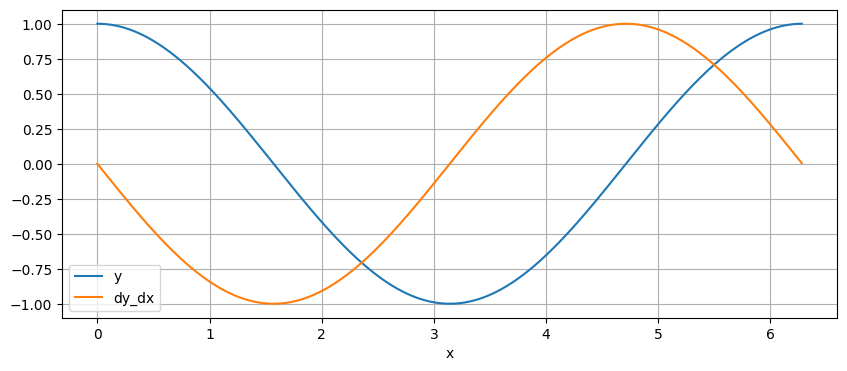

In [140]:
f = lambda x : tf.cos(x)

x = np.arange(0, 2*np.pi, 0.01)
y, dy_dx = f(x), BasicTF.differentiate(f, x)

plt.figure(figsize=(10, 4))
plt.plot(x, y, label="y")
plt.plot(x, dy_dx, label="dy_dx")
plt.grid(True)
plt.legend()
plt.xlabel("x")
plt.show()

Use the function to plot a graph of of the $sigmoid$ function and its derivative:

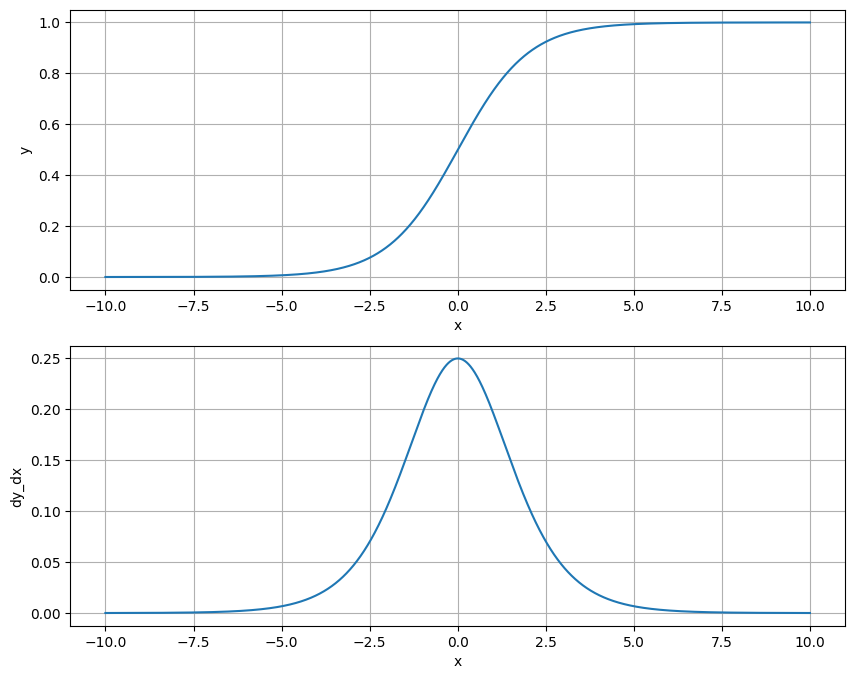

In [141]:
f = lambda x : tf.sigmoid(x)

x = np.arange(-10., 10., 0.01)
y, dy_dx = f(x), BasicTF.differentiate(f, x)

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(2, 1, 2)
plt.plot(x, dy_dx)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("dy_dx")
plt.show()

### <font color="#CA3532">Exercise 4. Gradient descent to find the minimum of a function</font>

We can use the automatic differentiation of TensorFlow to minimize a function using the gradient descent method.

In the file ``dlfbt_lab1.py``, complete the code of the function ``BasicTF.gradient_descent(f, x0, learning_rate, niters)`` that finds a minimum of a function using gradient descent. The function receives the following arguments:

- ``f``: the function to minimize
- ``x0``: the initial value
- ``learning_rate``: the learning rate
- ``niters``: the number of iterations

The function returns a Numpy array with all the values of $x$.

You can run the following code to test your implementation.

Find the minimum of the function $f(x) = (x-4)^{2}$:

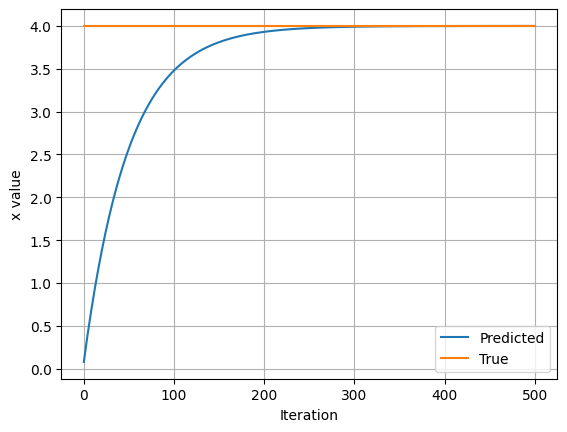

In [49]:
f = lambda x : (x - 4)**2
x_history = BasicTF.gradient_descent(f, 0.0, 1.e-2, 500)

# Plot x versus iteration:
plt.plot(x_history)
plt.plot([0, 500], [4, 4])
plt.grid(True)
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()

Find a local minimum of the function $f(x) = \cos x$:

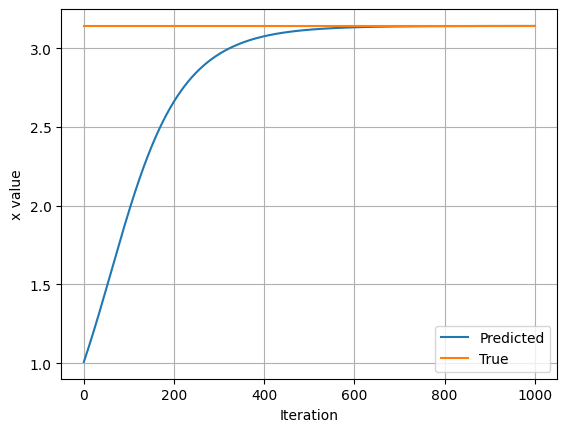

In [50]:
f = lambda x : tf.cos(x)
x_history = BasicTF.gradient_descent(f, 1.0, 1.e-2, 1000)

# Plot x versus iteration:
plt.plot(x_history)
plt.plot([0, 1000], [np.pi, np.pi])
plt.grid(True)
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()

### <font color="#CA3532">Exercise 5. Linear regression</font>

Complete the code of the class ``LinearRegressionModel_TF`` by filling all the ``TO-DO`` blocks, so that it implements a Linear Regression model using TensorFlow. Note that the gradients need not be explicitly computed and must be obtained from the *gradient tape*.

In [51]:
from dlfbt_lab1 import LinearRegressionModel_TF

Run the following tests to check your implementation.

Test the ``predict`` method:

In [52]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(noise=0.0, n=500)

linrm = LinearRegressionModel_TF()
linrm.w = tf.Variable(dg.a)
linrm.b = tf.Variable(dg.b)

y = linrm.predict(dg.x)

tol = 1.e-8
assert y.shape == (500, 1)
assert np.abs(y - dg.t).max() < tol
assert linrm.get_loss(dg.x, dg.t) < tol

Test the ``compute_gradients`` method:

In [53]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(n=50000, seed=17)

linrm = LinearRegressionModel_TF()
linrm.w = tf.Variable(dg.a)
linrm.b = tf.Variable(dg.b)

db, dw = linrm.compute_gradients(dg.x, dg.t)

tol = 1.e-8
assert db.shape == (1, 1)
assert np.abs(db[0][0] + 0.00704326) < tol
assert dw.shape == (4, 1)
assert np.abs(dw[0][0] + 0.05353578) < tol
assert np.abs(dw[1][0] + 0.03276935) < tol
assert np.abs(dw[2][0] + 0.00337341) < tol
assert np.abs(dw[3][0] + 0.03293776) < tol

Test the ``fit`` method:

In [54]:
dg = dlfbt.DataGeneratorLinear(a=[2.0, 2.0])
dg.create_dataset(n=500, seed=17)

linrm = LinearRegressionModel_TF(2)
linrm.w = tf.Variable([[-2.0], [-2.0]], dtype=tf.dtypes.float64)
linrm.b = tf.Variable([[-3.0]], dtype=tf.dtypes.float64)

loss = linrm.fit(dg.x, dg.t, 0.01, 100)

tol = 1.e-8
assert np.abs(loss[-1] - 2.660068435196912) < tol

Compare the two linear regression implementations (with Numpy and with TensorFlow):

In [55]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(n=50000, seed=17)

# Numpy implementation:
linrm_np = LinearRegressionModel(4)

# TensorFlow implementation:
linrm_tf = LinearRegressionModel_TF()
linrm_tf.w = tf.Variable(linrm_np.w.copy())
linrm_tf.b = tf.Variable(linrm_np.b.copy())

# Fit both models to data:
loss_np = linrm_np.fit(dg.x, dg.t, 0.01, 100)
loss_tf = linrm_tf.fit(dg.x, dg.t, 0.01, 100)

The two curves should overlap:

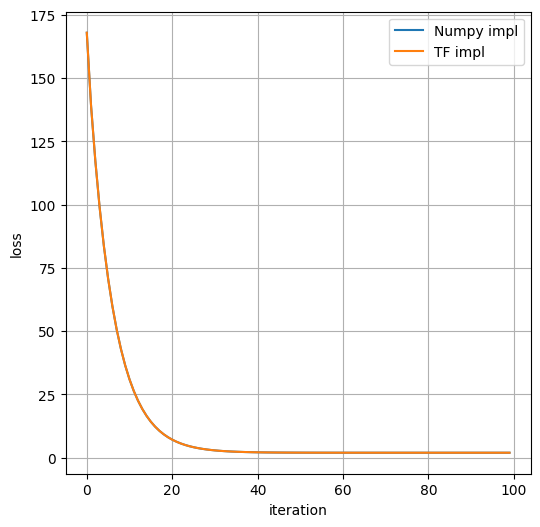

In [56]:
plt.figure(figsize=(6, 6))
plt.plot(loss_np, label="Numpy impl")
plt.plot(loss_tf, label="TF impl")
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

### <font color="#CA3532">Exercise 6. Implementation of a neural network with Numpy</font>

Complete the code of the class ``NeuralNetwork`` by filling all the ``TO-DO`` blocks, so that it implements a Neural Network model using Numpy only. You must explicitly calculate the gradients.


In [57]:
from dlfbt_lab1 import NeuralNetwork

You may run the following tests to check your implementation.

**1. Test the ``predict``method:**

In [58]:
np.random.seed(17)
x = np.random.randn(3, 20)

net = NeuralNetwork([(3, 'input'), (10, 'sigmoid'), (1, 'sigmoid')])
z, y = net.predict(x)

assert z[0].shape == (10, 20)
assert y[0].shape == (10, 20)
assert z[1].shape == (1, 20)
assert y[1].shape == (1, 20)

# Array values, should match those on the test file:
with open('DLFBT-LAB/data/test_nn_numpy_predict.pickle', 'rb') as handle:
    [zexp, yexp] = pickle.load(handle)

tol = 1.e-8
for zp, yp, ze, ye in zip(z, y, zexp, yexp):
    assert np.max(np.abs(zp - ze)) < tol
    assert np.max(np.abs(yp - ye)) < tol

**2. Test the ``compute_gradients`` method:**

In [59]:
np.random.seed(17)
x = np.random.randn(3, 20)
t = np.random.randn(1, 20)

net = NeuralNetwork([(3, 'input'), (10, 'sigmoid'), (1, 'linear')])
dW, db = net.compute_gradients(x, t)

assert dW[0].shape == (10, 3)
assert db[0].shape == (10, 1)
assert dW[1].shape == (1, 10)
assert db[1].shape == (1, 1)

# Array values, should match those on the test file:
with open('DLFBT-LAB/data/test_nn_numpy_compute_gradients.pickle', 'rb') as handle:
    [dWexp, dbexp] = pickle.load(handle)

tol = 1.e-8
for dwp, dbp, dwe, dbe in zip(dW, db, dWexp, dbexp):
    assert np.max(np.abs(dwp - dwe)) < tol
    assert np.max(np.abs(dbp - dbe)) < tol

**3. Test the ``fit`` method on a regression problem:**

In [60]:
dg = dlfbt.DataGeneratorLinear(a=[2.0, 2.0])
dg.create_dataset(n=1000, seed=17, noise=1.0)
x = dg.x.transpose()
t = dg.t.transpose()

np.random.seed(23)
net = NeuralNetwork([(2, 'input'), (1, 'linear')])
loss = net.fit(x, t, 0.01, 100, 1000, NeuralNetwork.mse_loss)
z, y = net.predict(x)

assert z[0].shape == (1, 1000)
assert y[0].shape == (1, 1000)

# Array values, should match those on the test file:
with open('DLFBT-LAB/data/test_nn_numpy_fit.pickle', 'rb') as handle:
    [zexp, yexp] = pickle.load(handle)

tol = 1.e-8
for zp, yp, ze, ye in zip(z, y, zexp, yexp):
    assert np.max(np.abs(zp - ze)) < tol
    assert np.max(np.abs(yp - ye)) < tol

Plot loss versus epoch:

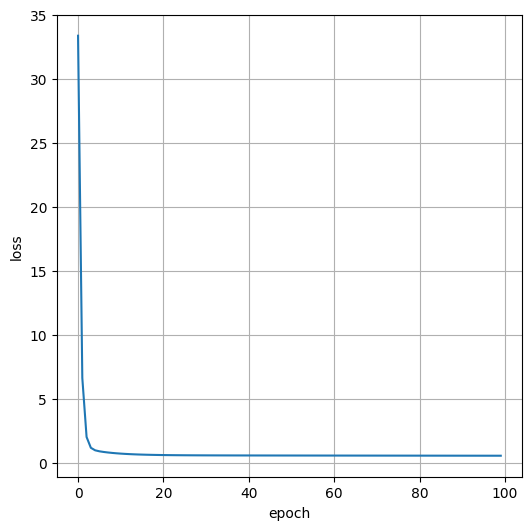

In [61]:
plt.figure(figsize=(6, 6))
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

Plot predictions versus targets (should distribute along $y=x$):

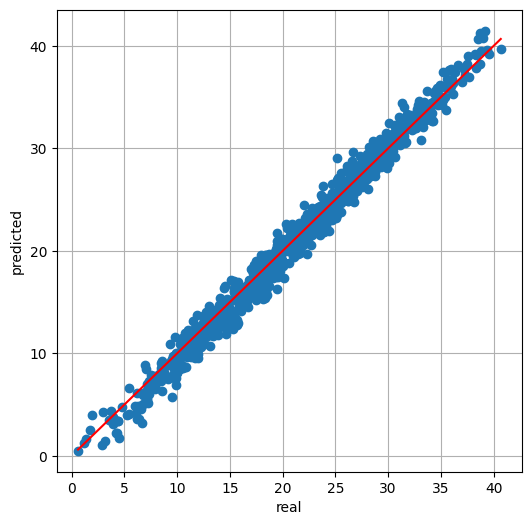

In [62]:
_, y = net.predict(x)
y = y[-1].transpose()
plt.figure(figsize=(6, 6))
plt.plot(dg.t, y, 'o')
plt.plot([dg.t.min(), dg.t.max()], [dg.t.min(), dg.t.max()], 'r-')
plt.xlabel('real')
plt.ylabel('predicted')
plt.grid(True)
plt.show()

### <font color="#CA3532">Exercise 7. Implementation of a neural network with TensorFlow</font>

Complete the code of the class ``NeuralNetwork_TF`` by filling all the ``TO-DO`` blocks, so that it implements a Neural Network model using TensorFlow. Now the gradients should be obtained from the gradient tape.


In [63]:
from dlfbt_lab1 import NeuralNetwork_TF

You may run the following tests to check your implementation.

**1. Test the ``predict``method:**

In [64]:
np.random.seed(17)
tf.random.set_seed(17)
x = np.random.randn(3, 20)

net = NeuralNetwork_TF([(3, None), (10, tf.sigmoid), (1, tf.sigmoid)])
y = net.predict(x)

assert y.shape == (1, 20)

# Array values, should match those on the test file:
with open('DLFBT-LAB/data/test_nn_tf_predict.pickle', 'rb') as handle:
    yexp = pickle.load(handle)

tol = 1.e-8
assert np.max(np.abs(y - yexp)) < tol

**2. Test the ``compute_gradients`` method:**

In [65]:
np.random.seed(17)
tf.random.set_seed(17)
x = np.random.randn(3, 20)
t = np.random.randn(1, 20)

net = NeuralNetwork_TF([(3, None), (10, tf.sigmoid), (1, tf.identity)])
db, dW = net.compute_gradients(x, t, NeuralNetwork_TF.mse_loss)

assert dW[0].shape == (10, 3)
assert db[0].shape == (10, 1)
assert dW[1].shape == (1, 10)
assert db[1].shape == (1, 1)

# Array values, should match those on the test file:
with open('DLFBT-LAB/data/test_nn_tf_compute_gradients.pickle', 'rb') as handle:
    [dWexp, dbexp] = pickle.load(handle)

tol = 1.e-8
for dwp, dbp, dwe, dbe in zip(dW, db, dWexp, dbexp):
    assert np.max(np.abs(dwp - dwe)) < tol
    assert np.max(np.abs(dbp - dbe)) < tol

**3. Test the ``fit`` method on a regression problem:**

In [66]:
dg = dlfbt.DataGeneratorLinear(a=[2.0, 2.0])
dg.create_dataset(n=1000, seed=17, noise=1.0)
x = dg.x.transpose()
t = dg.t.transpose()

np.random.seed(23)
tf.random.set_seed(23)
net = NeuralNetwork_TF([(2, None), (1, tf.identity)])
loss = net.fit(x, t, 0.01, 100, 1000, NeuralNetwork_TF.mse_loss)
y = net.predict(x)

# Array shape, should be (1, 1000):
assert y.shape == (1, 1000)

# Array values, should match those on the test file, so that all prints are 0
# or close to 0:
with open('DLFBT-LAB/data/test_nn_tf_fit.pickle', 'rb') as handle:
    yexp = pickle.load(handle)

tol = 1.e-8
assert np.max(np.abs(y - yexp)) < tol

Plot loss versus epoch:

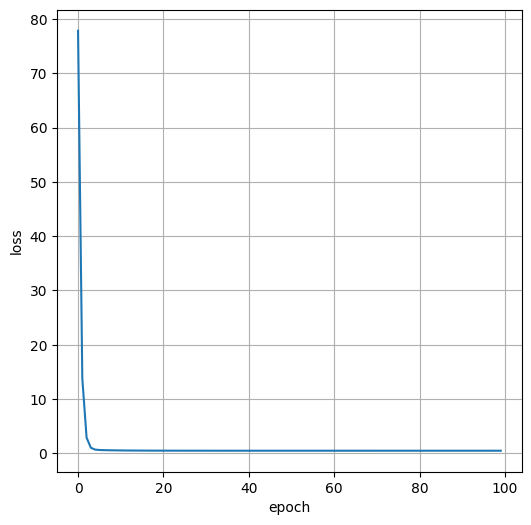

In [67]:
plt.figure(figsize=(6, 6))
plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

Plot predictions versus targets (should distribute along $y=x$):

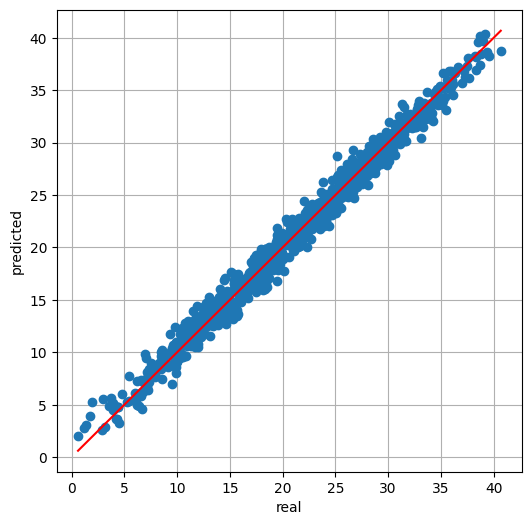

In [68]:
y = net.predict(x).numpy().transpose()
plt.figure(figsize=(6, 6))
plt.plot(dg.t, y, 'o')
plt.plot([dg.t.min(), dg.t.max()], [dg.t.min(), dg.t.max()], 'r-')
plt.xlabel('real')
plt.ylabel('predicted')
plt.grid(True)
plt.show()

### <font color="#CA3532">Comparison between the two implementations</font>

The following are additional tests to check that the two implementations (with Numpy and with TensorFlow) provide the same results.

``predict``:

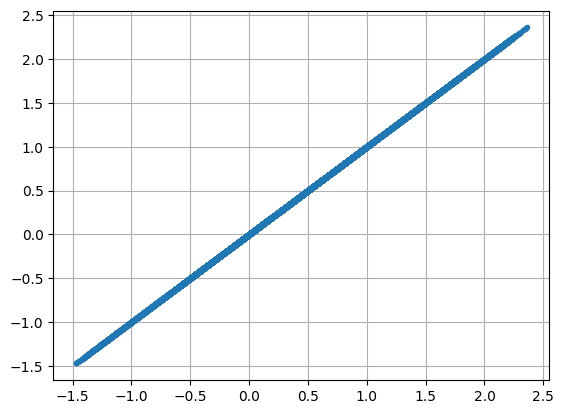

In [69]:
dg = dlfbt.DataGeneratorLinear(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(n=50000, seed=17)
x = dg.x.transpose()
t = dg.t.transpose()

# Numpy implementation:
r_np = NeuralNetwork([(4, 'input'), (10, 'sigmoid'), (1, 'linear')])

# TensorFlow implementation:
r_tf = NeuralNetwork_TF([(4, None), (10, tf.sigmoid), (1, tf.identity)])

# Copy weights and biases from numpy to tf:
r_tf.b = [tf.Variable(b.copy()) for b in r_np.b]
r_tf.W = [tf.Variable(w.copy()) for w in r_np.W]

# Run predict for both models:
_, ynp = r_np.predict(x)
ynp = ynp[-1]
ytf = r_tf.predict(x)

# Plot should be diagonal:
plt.plot(ynp[0], ytf[0], '.')
plt.grid(True)
plt.show()

# Difference should be close to 0:
tol = 1.e-8
assert np.max(np.abs(ynp-ytf)) < tol

``compute_gradients``:

In [70]:
# Compute the gradients with both models:
dW_np, db_np = r_np.compute_gradients(x, t)
db_tf, dW_tf = r_tf.compute_gradients(x, t, NeuralNetwork_TF.mse_loss)

# Difference should be close to 0:
tol = 1.e-8
assert np.max(np.abs(db_np[0] - db_tf[0].numpy())) < tol
assert np.max(np.abs(db_np[1] - db_tf[1].numpy())) < tol
assert np.max(np.abs(dW_np[0] - dW_tf[0].numpy())) < tol
assert np.max(np.abs(dW_np[1] - dW_tf[1].numpy())) < tol

``fit``:

In [71]:
# Run fit on both models:
np.random.seed(seed=233)
loss_np = r_np.fit(x, t, 0.01, 100, 5000, NeuralNetwork.mse_loss)
np.random.seed(seed=233)
loss_tf = r_tf.fit(x, t, 0.01, 100, 5000, NeuralNetwork_TF.mse_loss)

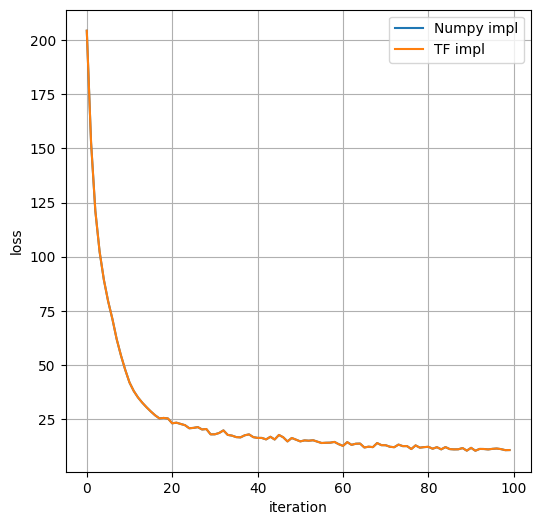

In [72]:
# The two curves should overlap:
plt.figure(figsize=(6, 6))
plt.plot(loss_np, label="Numpy impl")
plt.plot(loss_tf, label="TF impl")
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

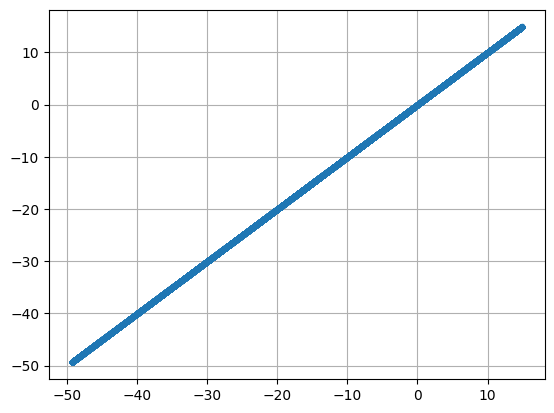

In [73]:
# Predict after training:
_, ynp = r_np.predict(x)
ynp = ynp[-1]
ytf = r_tf.predict(x)

# Plot should be diagonal:
plt.plot(ynp[0], ytf[0], '.')
plt.grid(True)
plt.show()

# Difference should be close to 0:
tol = 1.e-8
assert np.max(np.abs(ynp-ytf)) < tol

Same as before with a classification problem:


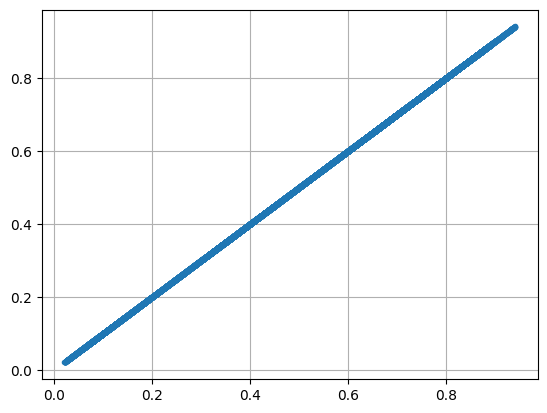

In [74]:
dg = dlfbt.DataGeneratorLogistic(a=[-5.0, 2.0, -3.0, 2.0])
dg.create_dataset(n=50000, seed=17)
x = dg.x.transpose()
t = dg.t.transpose()

# Numpy implementation:
r_np = NeuralNetwork([(4, 'input'), (10, 'sigmoid'), (1, 'sigmoid')])

# TensorFlow implementation:
r_tf = NeuralNetwork_TF([(4, None), (10, tf.sigmoid), (1, tf.sigmoid)])

# Copy weights and biases from numpy to tf:
r_tf.b = [tf.Variable(b.copy()) for b in r_np.b]
r_tf.W = [tf.Variable(w.copy()) for w in r_np.W]

# Run predict on both models:
_, ynp = r_np.predict(x)
ynp = ynp[-1]
ytf = r_tf.predict(x)

# Plot should be diagonal:
plt.plot(ynp[0], ytf[0], '.')
plt.grid(True)
plt.show()

# Difference should be close to 0:
tol = 1.e-8
assert np.max(np.abs(ynp-ytf)) < tol

In [75]:
# Compute the gradients with both models:
dW_np, db_np = r_np.compute_gradients(x, t)
db_tf, dW_tf = r_tf.compute_gradients(x, t, NeuralNetwork_TF.cross_entropy_loss)

# Difference should be close to 0:
tol = 1.e-8
assert np.max(np.abs(db_np[0] - db_tf[0].numpy())) < tol
assert np.max(np.abs(db_np[1] - db_tf[1].numpy())) < tol
assert np.max(np.abs(dW_np[0] - dW_tf[0].numpy())) < tol
assert np.max(np.abs(dW_np[1] - dW_tf[1].numpy())) < tol

In [76]:
# Run fit on both models:
np.random.seed(seed=233)
loss_np = r_np.fit(x, t, 0.01, 100, 5000, NeuralNetwork.cross_entropy_loss)
np.random.seed(seed=233)
loss_tf = r_tf.fit(x, t, 0.01, 100, 5000, NeuralNetwork_TF.cross_entropy_loss)

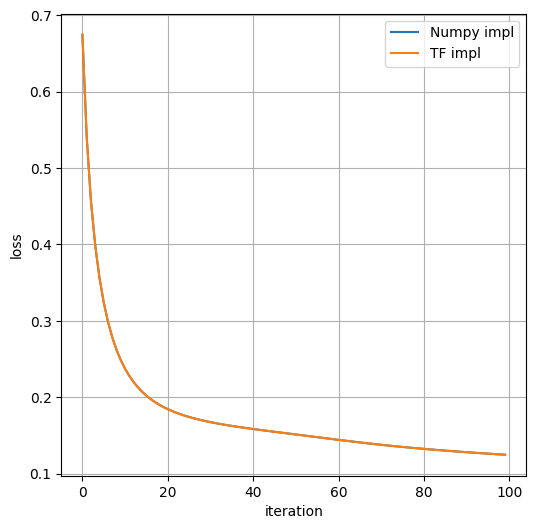

In [77]:
# The two curves should overlap:
plt.figure(figsize=(6, 6))
plt.plot(loss_np, label="Numpy impl")
plt.plot(loss_tf, label="TF impl")
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

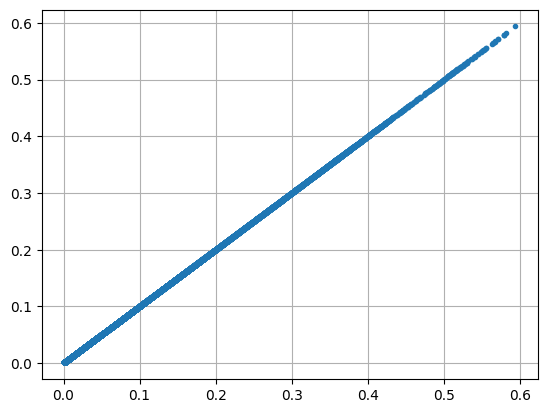

In [78]:
# Run predict on trained models:
_, ynp = r_np.predict(x)
ynp = ynp[-1]
ytf = r_tf.predict(x)

# Plot should be diagonal:
plt.plot(ynp[0], ytf[0], '.')
plt.grid(True)
plt.show()

# Difference should be close to 0:
tol = 1.e-8
assert np.max(np.abs(ynp-ytf)) < tol